In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd
p = "/Users/jenifervivar/Desktop/World_Countries_(Generalized)"
p1 = "/Users/jenifervivar/Desktop/tectonicplates-master"
#p = "/Users/jenifervivar/Desktop/World_Countries__Generalized_.shp"

world_map = gpd.read_file(p1)
world_map1=gpd.read_file(p)

## data loading

In [ ]:
import gmplot
  
# GoogleMapPlotter return Map object
# Pass the center latitude and
# center longitude
gmap1 = gmplot.GoogleMapPlotter(30.3164945,
                                78.03219179999999, 13 )

In [3]:
tracers = np.array(['Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
       'Hf', 'Ta', 'Th', 'U', 'Ni'], dtype=object)

morbs = "/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/Combined_data_MORB.csv"
df_morbs = pd.read_csv(morbs)


p_ = r"/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/combined_datasets"
combined_df = pd.read_csv(p_)
combined_df["Tectonic_Setting"] = combined_df["Tectonic_Setting"].str.strip()
c_df = combined_df.drop(["loc_keywords", "Location", "REFERENCE #", "ANALYZED MATERIAL", "SAMPLE NAME"], axis = 1)

both_df = pd.concat([c_df, df_morbs], axis = 0)
both_df.dropna(inplace = True)


# X, Y train split and balance

In [156]:
X = both_df[tracers]
Y = both_df["Tectonic_Setting"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
# X = sampled_df[col], y = sampled_df["Tectonic_setting"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,\
                                                    test_size=0.3, random_state=100, shuffle=True)

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)

In [208]:
y_bal.value_counts()

IAB     2353
OIB     2353
MORB    2353
Name: Tectonic_Setting, dtype: int64

In [157]:
np.max(X)

62.50835364868954

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


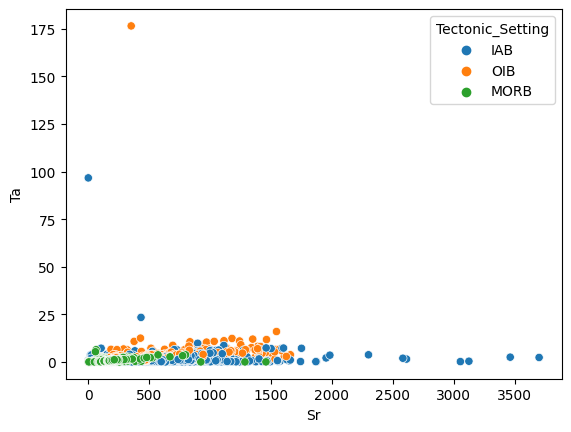

In [5]:
sns.scatterplot(both_df["Sr"], both_df["Ta"], hue=both_df["Tectonic_Setting"])
plt.show()

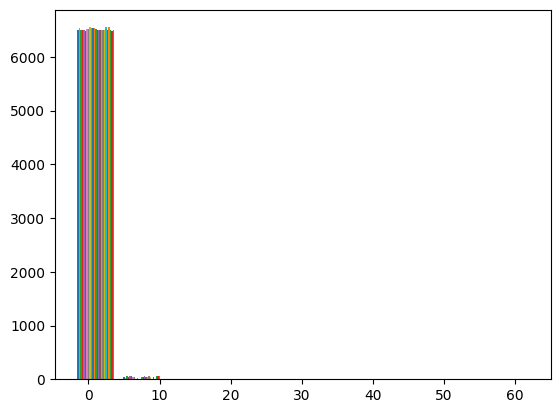

In [6]:
plt.hist(X)
plt.show()

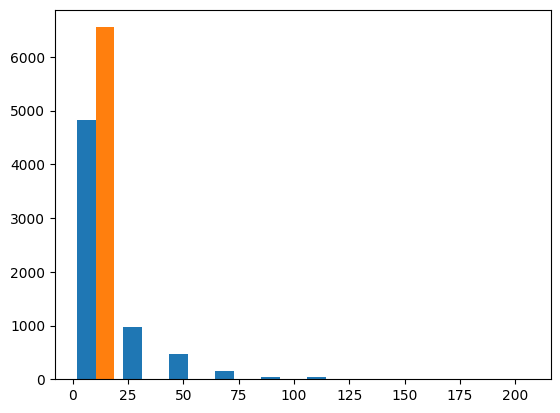

In [7]:
plt.hist(both_df[["Nb", "Ta"]])
plt.show()

## Outlier Detection

### LOF

measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

In [8]:
from sklearn.neighbors import LocalOutlierFactor
"""
When novelty is set to True be aware that you must only use predict, decision_function and score_samples on new unseen 
data and not on the training samples as this would lead to wrong results. I.e., the result of predict will not be the 
same as fit_predict. The scores of abnormality of the training samples are always accessible through the 
negative_outlier_factor_ attribute.
"""

clf = LocalOutlierFactor(n_neighbors=35, novelty = True)
clf.fit(X_bal)
r = clf.predict(X_test)


In [9]:
for i in range(len(tracers)):
    if r[i]== -1:
        print(i, r[i])

4 -1
12 -1


In [209]:
outliers_fraction 

0.1196398596062872

In [57]:
from sklearn.neighbors import LocalOutlierFactor
outliers_fraction = (len(X)/ 28)#28 known wronged labels
outliers_fraction = 28/outliers_fraction 
## LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)
lof = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)
r_=lof.fit_predict(X)

784 6553 6553


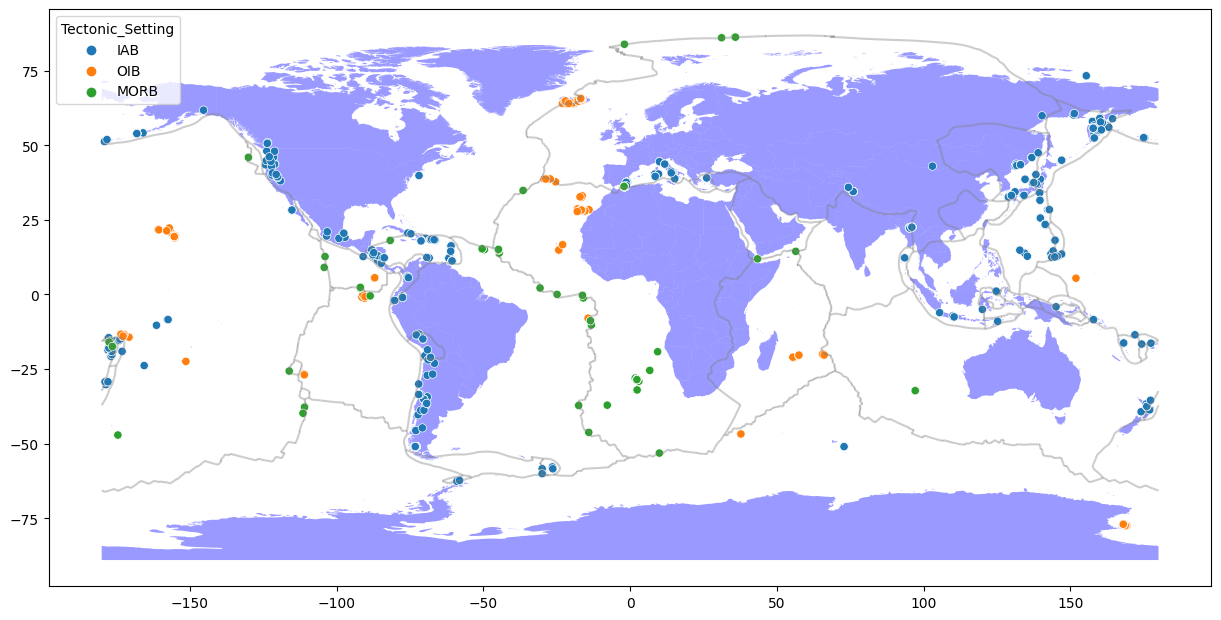

In [58]:
lat = []
lon = []
idx = []
y_collective = []
idx_collective=[]
for i in range(len(X)):
    if r_[i]== -1:
        lat.append(both_df["LONGITUDE"].iloc[i])
        lon.append(both_df["LATITUDE"].iloc[i])
        idx.append(i)
        
print(len(lat), len(X), len(r_))        
y_collective.append(both_df.iloc[idx].values)
idx_collective.append(idx)
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=lat, y=lon, ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[idx])


plt.show()

In [59]:
y_collective[0]

array([[51.143, 1.44, 18.13, ..., 55.82125, 160.36394, 'IAB'],
       [51.082, 1.428, 17.255, ..., 55.77447, 160.24247, 'IAB'],
       [50.238, 1.696, 16.654, ..., 55.76981, 160.23275, 'IAB'],
       ...,
       [50.6, 1.22, 15.9, ..., 14.9, -44.9, 'MORB'],
       [50.9, 1.22, 15.8, ..., 14.9, -44.9, 'MORB'],
       [53.1, 1.6, 15.1, ..., 15.118, -44.843, 'MORB']], dtype=object)

In [60]:
"""
The scores of abnormality of the training samples are accessible through the negative_outlier_factor_ attribute.
When novelty is set to True be aware that you must only use predict, decision_function and score_samples on new unseen data 
and not on the training samples as this would lead to wrong results

"""
lof.negative_outlier_factor_

array([-1.01702373, -1.07917645, -1.03116901, ..., -1.09106482,
       -1.10277258, -1.50998729])

In [61]:
print(len(lof.negative_outlier_factor_), len(X), len(r_))  

6553 6553 6553


(array([ 784.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5769.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

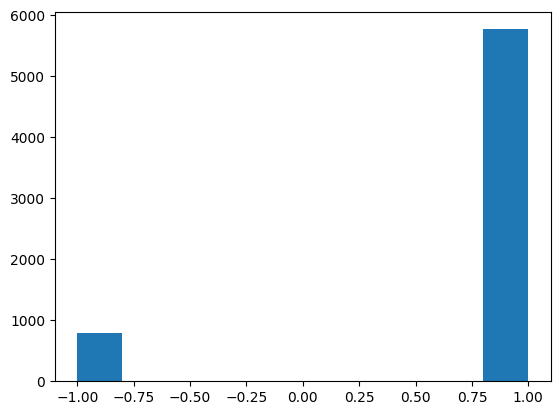

In [62]:
plt.hist(r_)

In [63]:
lof.n_neighbors_

35

## Isolation Forest

Isolation Forest Algorithm.

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.


In [234]:
from sklearn.ensemble import IsolationForest

#IsolationForest(contamination=outliers_fraction, random_state=42)
outliers_fraction = (len(X)/ 28)#28 known wronged labels
outliers_fraction = 28/outliers_fraction 
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

iforest = IsolationForest(n_estimators= 400, random_state = 42, max_samples=35,\
                          contamination= .15, n_jobs=30, bootstrap= True)
r_ = iforest.fit_predict(X)
r_

array([1, 1, 1, ..., 1, 1, 1])

983 6553 6553 983


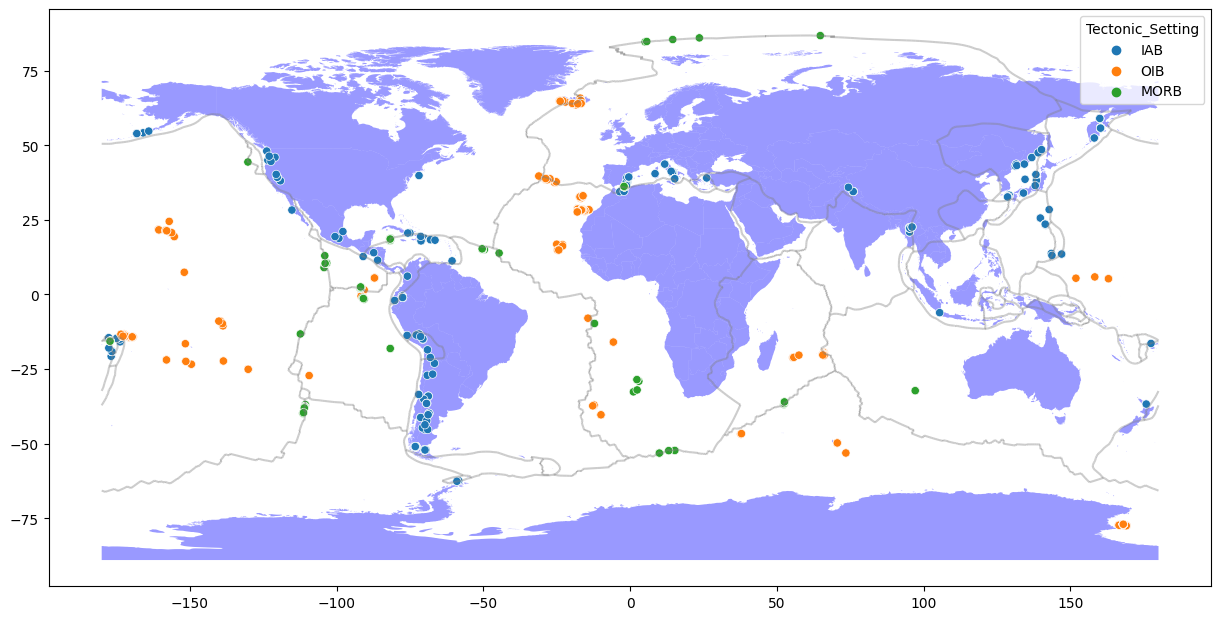

In [235]:
lat = []
lon = []
idx = []
for i in range(len(X)):
    if r_[i]== -1:
        lat.append(both_df["LONGITUDE"].iloc[i])
        lon.append(both_df["LATITUDE"].iloc[i])
        idx.append(i)
y_collective.append(both_df.iloc[idx].values)
idx_collective.append(idx)
print(len(lat), len(X), len(r_), len(idx))
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=lat, y=lon, ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[idx])


plt.show()

In [ ]:
len(y_collective[1])

## SVM One class
Unsupervised Outlier Detection.

Estimate the support of a high-dimensional distribution.

The implementation is based on libsvm.
svm.OneClassSVM is known to be sensitive to outliers and thus does not perform very well for outlier detection


In [238]:
#svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)
from sklearn.svm import OneClassSVM
outliers_fraction = (len(X)/ 28)#28 known wronged labels
outliers_fraction = 28/outliers_fraction 
#X = [[0], [0.44], [0.45], [0.46], [1]]
osvm = OneClassSVM(gamma = 'scale', nu=outliers_fraction,  kernel="rbf")
r_ = osvm.fit_predict(X)


784 6553


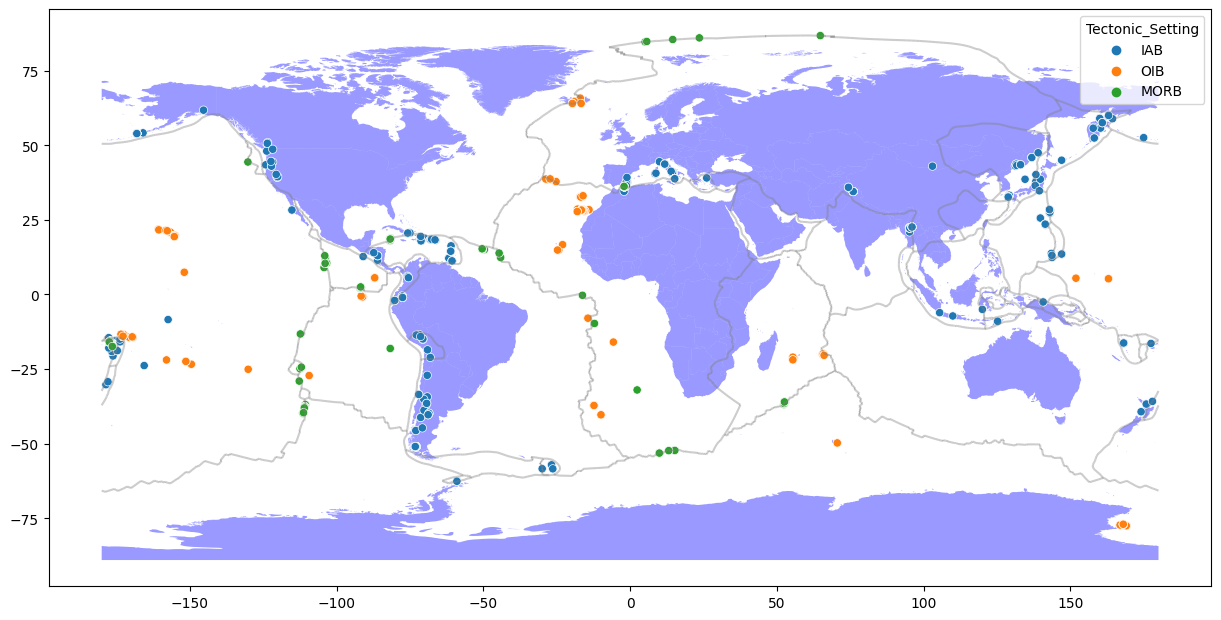

In [239]:
lat = []
lon = []
idx = []
for i in range(len(X)):
    if r_[i]== -1:
        lat.append(both_df["LONGITUDE"].iloc[i])
        lon.append(both_df["LATITUDE"].iloc[i])
        idx.append(i)
y_collective.append(both_df.iloc[idx].values)
idx_collective.append(idx)
print(len(idx), len(X))        
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=lat, y=lon, ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[idx])


plt.show()

In [198]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1.5, min_samples=20).fit(X)

In [199]:
r_=clustering.labels_
ix = np.where(r_ == -1)
print(len(ix[0]))

764


In [188]:
from sklearn.cluster import OPTICS


clustering = OPTICS(min_samples=10)
r= clustering.fit(X)


In [129]:
r_ = r.labels_
r_

array([-1, -1, -1, ..., -1, -1, -1])

In [130]:
r_

array([-1, -1, -1, ..., -1, -1, -1])

In [132]:
ix = np.where(r_ == -1)

In [133]:
ix[0]

array([   0,    1,    2, ..., 6550, 6551, 6552])

In [134]:
print(len(ix[0]))

5943


764 6553


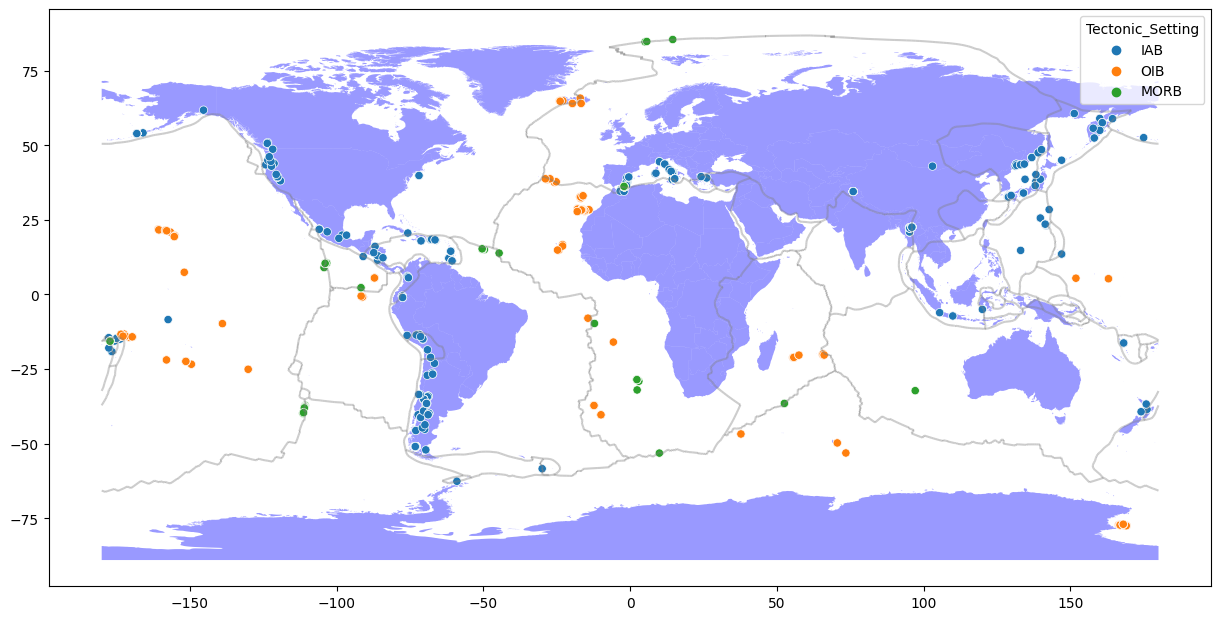

In [200]:
lat = []
lon = []
idx = []
for i in range(len(X)):
    if r_[i]== -1:
        lat.append(both_df["LONGITUDE"].iloc[i])
        lon.append(both_df["LATITUDE"].iloc[i])
        idx.append(i)
#idx_collective.append(idx)
#y_collective.append(both_df.iloc[idx].values)
print(len(idx), len(X))        
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=lat, y=lon, ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[idx])


plt.show()

## SGD One class 
### Solves linear One-Class SVM using Stochastic Gradient Descent.

This implementation is meant to be used with a kernel approximation technique (e.g. sklearn.kernel_approximation.Nystroem) to obtain results similar to sklearn.svm.OneClassSVM which uses a Gaussian kernel by default.

In [267]:
import numpy as np
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
outliers_fraction = (len(X)/ 28)#28 known wronged labels
outliers_fraction = 28/outliers_fraction 

#tweaking the variables decreases the number of detected outliers
oneSGD = make_pipeline(Nystroem(gamma=0.1, random_state=42, n_components=400),\
            linear_model.SGDOneClassSVM(nu=outliers_fraction,shuffle=True,\
            fit_intercept=True,random_state=42,tol=1e-6))
#clf = linear_model.SGDOneClassSVM(random_state=42, nu=outliers_fraction, shuffle=True, fit_intercept=True, tol=1e-6)
r_ = oneSGD.fit_predict(X)

r_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [266]:
idd= np.where(r_==-1)
type(idd)

tuple

In [271]:
idd

(array([   4,    5,   43,   45,   50,   51,   59,   61,   64,   87,  122,
         128,  132,  136,  144,  148,  149,  150,  151,  152,  153,  154,
         155,  156,  157,  158,  159,  160,  161,  165,  166,  167,  169,
         170,  171,  172,  173,  174,  175,  176,  178,  181,  182,  183,
         184,  185,  186,  189,  191,  196,  209,  213,  214,  215,  216,
         219,  220,  311,  319,  322,  340,  341,  344,  348,  391,  402,
         405,  406,  407,  408,  409,  410,  476,  478,  491,  493,  509,
         510,  511,  512,  513,  514,  515,  516,  517,  566,  593,  603,
         617,  630,  637,  640,  650,  651,  652,  653,  670,  673,  682,
         693,  722,  745,  756,  758,  759,  765,  790,  797,  798,  799,
         800,  801,  802,  803,  805,  806,  807,  809,  810,  813,  818,
         822,  823,  824,  825,  828,  829,  830,  831,  832,  833,  834,
         836,  838,  839,  840,  841,  842,  843,  844,  846,  859,  861,
         875,  876,  881,  882,  885, 

In [273]:
r_

1

841 6553


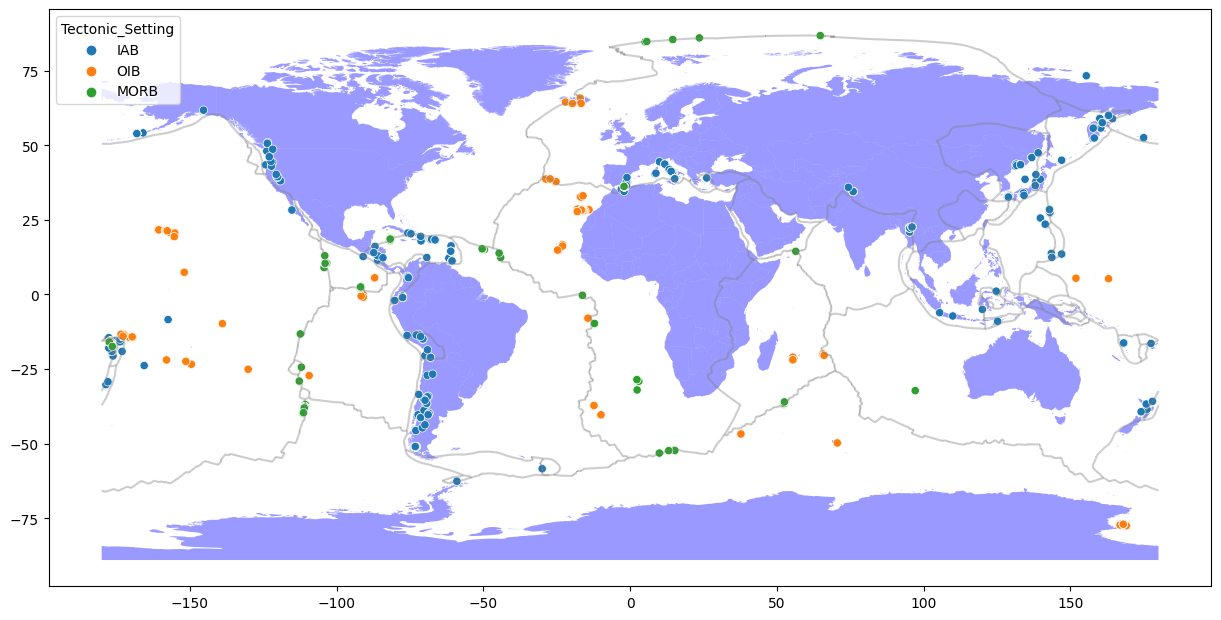

In [274]:
lat = []
lon = []
idx = []
for i in range(len(X)):
    if r_[i]== -1:
        lat.append(both_df["LONGITUDE"].iloc[i])
        lon.append(both_df["LATITUDE"].iloc[i])
        idx.append(i)
idx_collective.append(idx)
y_collective.append(both_df.iloc[idx].values)
print(len(idx), len(X))        
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=lat, y=lon, ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[idx])


plt.show()

## Elliptic Envelope
 An object for detecting outliers in a Gaussian distributed dataset.

In [260]:
from sklearn.covariance import EllipticEnvelope

# EllipticEnvelope(contamination=outliers_fraction, random_state=42)
outliers_fraction = (len(X)/ 28)#28 known wronged labels
outliers_fraction = 28/outliers_fraction 

ellip = EllipticEnvelope(random_state=42, contamination=outliers_fraction)
r_ = ellip.fit_predict(X)


In [262]:
r_

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
ellip.location_

array([-0.35040634, -0.36539931, -0.12618928, -0.35695621, -0.37035835,
       -0.39808938, -0.45942128, -0.4660788 , -0.22522995, -0.4623318 ,
       -0.39960903, -0.39095743, -0.35637505, -0.27719301, -0.20600443,
       -0.13072171, -0.10556426, -0.08396606, -0.05854524, -0.01915516,
       -0.34421809, -0.19346276, -0.36372004, -0.36696753, -0.08485172])

784 6553


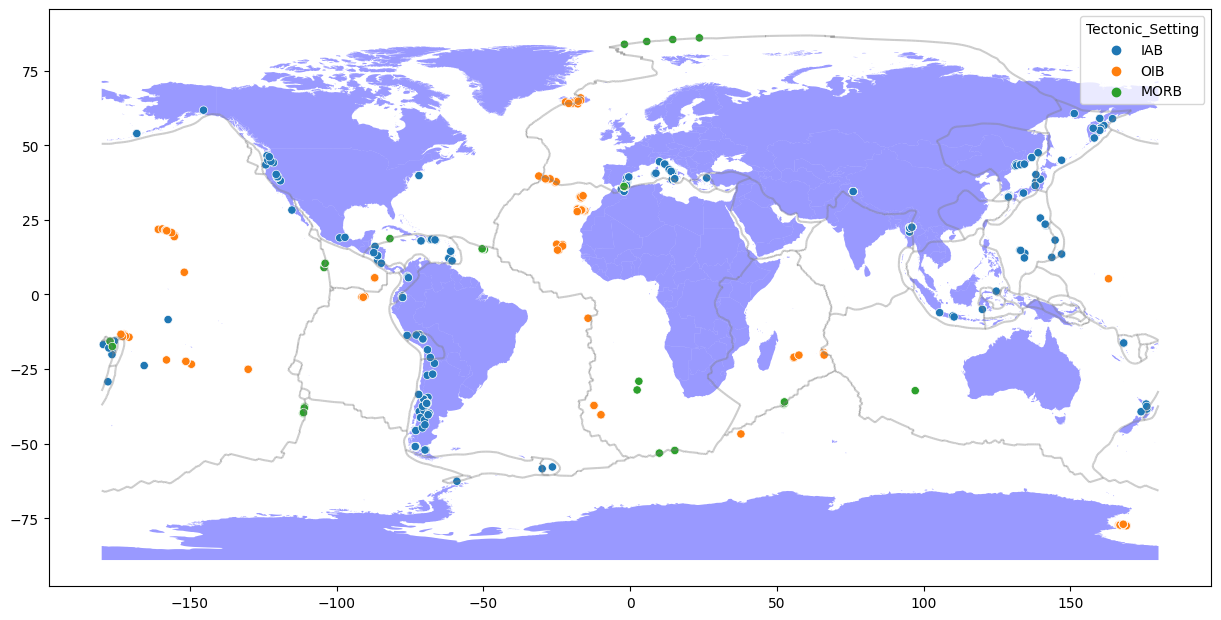

In [261]:
lat = []
lon = []
idx = []
for i in range(len(X)):
    if r_[i]== -1:
        lat.append(both_df["LONGITUDE"].iloc[i])
        lon.append(both_df["LATITUDE"].iloc[i])
        idx.append(i)
idx_collective.append(idx)        
y_collective.append(both_df.iloc[idx].values)
print(len(idx), len(X))       
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=lat, y=lon, ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[idx])


plt.show()

In [86]:
from scipy import stats as st

In [74]:
idx_collective_ = np.array(idx_collective)
idx_collective_

array([[  43,   59,   61, ..., 6516, 6517, 6552],
       [   4,   43,   45, ..., 6372, 6373, 6374],
       [   4,   43,   45, ..., 6372, 6373, 6374],
       [   4,   34,   43, ..., 6372, 6373, 6374],
       [   4,    5,   33, ..., 6354, 6365, 6366]])

In [80]:
idx_collective_=idx_collective_.flatten()
idx_collective_

array([  43,   59,   61, ..., 6354, 6365, 6366])

In [91]:
print(len(idx_collective_), type(idx_collective_))

3920 <class 'numpy.ndarray'>


In [92]:
idx_collective_

array([  43,   59,   61, ..., 6354, 6365, 6366])

In [275]:
vals, counts = np.unique(idx_collective_, return_counts=True)
print(vals, counts)

[   4    5   33 ... 6516 6517 6552] [4 1 1 ... 1 1 1]


In [277]:
print(np.max(vals), len(X))

6552 6553


In [100]:
votes = []
for i in range(len(vals)):
    if counts[i]>=3:
        votes.append(vals[i])
votes

[4,
 43,
 45,
 59,
 61,
 64,
 122,
 136,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 163,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 181,
 182,
 183,
 184,
 186,
 188,
 191,
 209,
 216,
 219,
 220,
 311,
 319,
 322,
 341,
 344,
 348,
 391,
 402,
 405,
 406,
 407,
 408,
 409,
 410,
 476,
 478,
 491,
 493,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 566,
 593,
 603,
 617,
 630,
 637,
 640,
 650,
 651,
 652,
 653,
 670,
 673,
 682,
 693,
 722,
 745,
 756,
 758,
 759,
 761,
 765,
 798,
 799,
 800,
 801,
 802,
 803,
 805,
 806,
 807,
 809,
 810,
 813,
 822,
 828,
 829,
 830,
 831,
 832,
 833,
 839,
 840,
 841,
 843,
 844,
 846,
 861,
 875,
 881,
 882,
 885,
 886,
 902,
 903,
 906,
 912,
 913,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 923,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 990,
 996,
 998,
 999,
 1000,
 1001,
 1002,
 1006,
 1010,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1051,
 1062,
 1077,
 1079,
 1

In [278]:
np.max(votes)

6374

In [101]:
len(votes)

704

In [40]:
from scipy import stats as st
print(st.mode(y_collective ))

/var/folders/sk/km6c1g654036cmvl40zycd0m0000gn/T/ipykernel_1448/2553540933.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(st.mode(y_collective ))
/var/folders/sk/km6c1g654036cmvl40zycd0m0000gn/T/ipykernel_1448/2553540933.py:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  print(st.mode(y_collective ))


ModeResult(mode=array([[[50.845, 1.913, 16.231, ..., 55.816, 160.38636, 'IAB'],
        [51.143, 1.44, 18.13, ..., 55.82125, 160.36394, 'IAB'],
        [51.088, 1.423, 17.621, ..., 55.78917, 160.38908, 'IAB'],
        ...,
        [50.39, 2.24, 13.48, ..., -13.22, -112.33, 'MORB'],
        [50.37, 2.49, 13.07, ..., 13.0, -104.0, 'MORB'],
        [50.06, 2.81, 12.99, ..., 44.4, -130.2, 'MORB']]], dtype=object), count=array([[[5, 5, 5, ..., 5, 5, 5],
        [3, 3, 3, ..., 3, 3, 5],
        [3, 3, 3, ..., 3, 3, 5],
        ...,
        [4, 4, 4, ..., 4, 4, 5],
        [4, 4, 4, ..., 4, 4, 5],
        [4, 4, 4, ..., 4, 4, 5]]]))


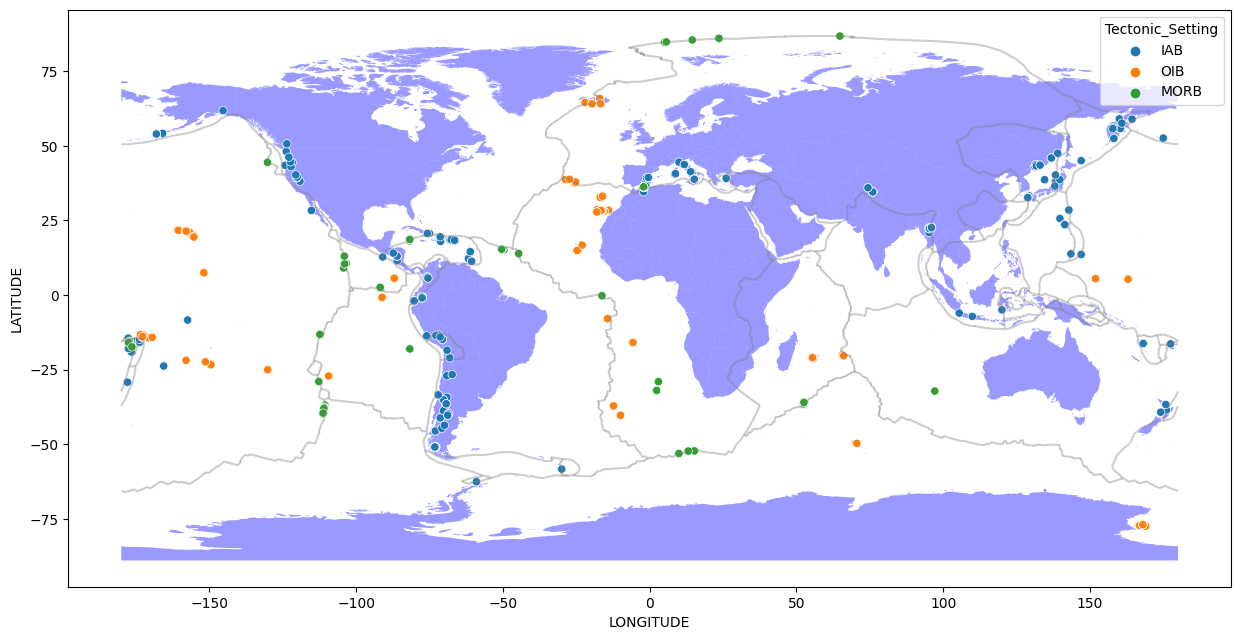

In [102]:
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=both_df["LONGITUDE"].iloc[votes], y=both_df["LATITUDE"].iloc[votes],\
                ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[votes])


plt.show()

In [ ]:
both_df["Tectonic_Setting"].iloc[idx]

## PLOTS of OUTLIERS DETECTORS

In [ ]:
anomaly_algorithms= [("Robust Elliptic covariance", ellip),("One-Class SVM", osvm),("Isolation Forest", iforest),\
                     ("Local Outlier Factor", lof), ( "One-Class SVM (SGD)", oneSGD)]

In [ ]:
both_df[["Sr", "Nb"]].values

In [ ]:
xx, yy = np.meshgrid(both_df[["Sr", "Nb"]].values, Y)

In [ ]:
yy

In [ ]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(Y)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

In [ ]:
anomaly_algorithms= [("Robust Elliptic covariance", ellip),("One-Class SVM", osvm),("Isolation Forest", iforest),\
                     ("Local Outlier Factor", lof), ( "One-Class SVM (SGD)", oneSGD)]

plot_num = 1
import time
xx, yy = np.meshgrid(both_df[["Sr", "Nb"]], onehot_encoded)
datasets = both_df[["Sr", "Nb"]]

for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    
    y_pred = algorithm.fit_predict(both_df[["Sr", "Nb"]])
    t1 = time.time()
    # plot the levels lines and the points
     # LOF does not implement predict
    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    colors = np.array(["#377eb8", "#ff7f00", "ff00bf"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    #plt.xlim(-7, 7)
    #plt.ylim(-7, 7)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plot_num += 1

plt.show()


# training variables x, y assignment
### df_miss funct

In [ ]:
def df_miss(df, y_test, y_result):
    #getting only the indx where the condition is treu from y_test indexes
    #as they relate to the data frame
    indexes = np.where(y_test != y_result_, y_test.index.values, None)
    indexes_ = indexes[indexes != np.array(None)]
   
    y_test_ = y_test.values
    y_ = []
    y = []
    for i in range(len(y_result)):
        
        if y_result[i] != y_test_[i]:
            y_.append(y_result[i])
            y.append(y_test_[i])
        else:
            pass
    
    data = {"Lon": np.array([df["LONGITUDE"].iloc[i] for i in indexes_]), \
            "Lat": np.array([df["LATITUDE"].iloc[i] for i in indexes_]),\
            "true_y": np.array([df["Tectonic_Setting"].iloc[i] for i in indexes_]),\
            #"LONGITUDE": [df["LONGITUDE"].iloc[i] for i in indexes[0]],
            #"LATITUDE" :[df["LATITUDE"].iloc[i] for i in indexes[0]],
           #"true_y": np.array(y),\
           #"reference": [df["REFERENCE #"].iloc[i] for i in indexes[0]],#,\
           "y_hat" : np.array(y_)  
           }
   
    return pd.DataFrame(data, index = indexes_),  indexes_

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 1, random_state = 1, multi_class = 'auto', solver = 'lbfgs', penalty='l2', max_iter=5000)
lr.fit(X_bal, y_bal)
y_result_ = lr.predict(X_test)
df_test_miss1, idx = df_miss(both_df, y_test, y_result_)
miss_morbs = df_test_miss1[df_test_miss1['true_y']=="MORB"]
data = {}
data_miss = {}
miss_idx = miss_morbs.index.values
for i in miss_idx:
    
    data[i] = [[both_df["LATITUDE"].iloc[i]], [both_df["LONGITUDE"].iloc[i]]]
    #data_miss[i] = df_test_miss1[["true_y", "y_hat"]].iloc[i]
    
        

In [ ]:
idx = [k for k in data.keys()]

In [ ]:
lat = []
long = []
for key in data.keys():
    lat.append(data[key][0][0])
    long.append(data[key][1][0])

In [ ]:
idx = [k for k in data.keys()]
print(len(idx), len(X))       
fig, ax = plt.subplots(figsize=(15,15))
world_map1.plot(ax=ax, alpha=0.4, color='blue')
world_map.plot(ax=ax, alpha=0.4, color='grey')

sns.scatterplot(x=lat, y=long, ax = ax, sizes=(40, 400), hue = both_df["Tectonic_Setting"].iloc[idx])


plt.show()

In [ ]:
X = both_df[tracers]
Y = both_df["Tectonic_Setting"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
# X = sampled_df[col], y = sampled_df["Tectonic_setting"]
X_train, X_test, y_train, y_test = train_test_split(x_standard,Y,\
                                                    test_size=0.3, random_state=100, shuffle=True)

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 1, random_state = 1, multi_class = 'auto', solver = 'lbfgs', penalty='l2', max_iter=5000)


In [ ]:
len(both_df)

In [ ]:
d = both_df[["Sr", "Nb"]]
d

In [ ]:
#lof, iforest, ellip
anomaly_algorithms= [("Robust Elliptic covariance", ellip),("One-Class SVM", osvm),("Isolation Forest", iforest),\
                     ("Local Outlier Factor", lof), ( "One-Class SVM (SGD)", oneSGD)]

In [ ]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=42),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

# Compare given classifiers under given settings


plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#377eb8", "#ff7f00"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()


In [ ]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))
print(xx, yy)

In [ ]:
k = 0
for i, j in enumerate(datasets):
    print(i, j)
    k +=1
    if k == 2:
        break


In [ ]:
len(datasets[0])

In [ ]:
blobs_params

In [ ]:
print(xx)


In [ ]:
print(yy)

In [ ]:
#xv, yv = np.meshgrid(x, y, indexing='ij')

In [ ]:

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=42),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#377eb8", "#ff7f00"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()